In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")


# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/clevr/"))  # To find local version
import clevr

%matplotlib inline 


# Directory of images to run detection on
#IMAGE_DIR = os.path.join(ROOT_DIR, "datasets/clevr/")
IMAGE_DIR = '/home/raswanth/AI/Neuro-Symbolic Ai/CLEVR_v1.0/images/val' 

class InferenceConfig(clevr.ClevrConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()




Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                109
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [2]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
CLEVR_MODEL_PATH = '/home/raswanth/AI/Neuro-Symbolic Ai/Neuro-Symbolic-AI/Scene_Parser/Weights/mask_rcnn_clevr_master.h5'


# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
# Load weights trained on MS-COCO
model.load_weights(CLEVR_MODEL_PATH, by_name=True)

# CLEVR Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')

#class_names = ['BG', 'cube', 'sphere', 'cylinder']


In [4]:
shape_categories = {'cube': 1,
                            'sphere': 2,
                            'cylinder': 3}
material_categories = {'rubber': 1,
                               'metal': 2}
color_categories = {'gray': 1,
                            'blue': 2,
                            'brown': 3,
                            'yellow': 4,
                            'red': 5,
                            'green': 6,
                            'purple': 7,
                            'cyan': 8}
size_categories = {'small': 1,
                           'large': 2}
class_names = ['BG']
for shape in shape_categories:
    for mat in material_categories:
        for col in color_categories:
            for size in size_categories:
                class_name = shape + " " + mat + " " + col + " " + size
                class_names.append(class_name)


In [5]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]

In [6]:
file_names

['CLEVR_val_000462.png',
 'CLEVR_val_007847.png',
 'CLEVR_val_000566.png',
 'CLEVR_val_013390.png',
 'CLEVR_val_012000.png',
 'CLEVR_val_001766.png',
 'CLEVR_val_001230.png',
 'CLEVR_val_001042.png',
 'CLEVR_val_013520.png',
 'CLEVR_val_009360.png',
 'CLEVR_val_011818.png',
 'CLEVR_val_013161.png',
 'CLEVR_val_006188.png',
 'CLEVR_val_011939.png',
 'CLEVR_val_006539.png',
 'CLEVR_val_011677.png',
 'CLEVR_val_005868.png',
 'CLEVR_val_005973.png',
 'CLEVR_val_007469.png',
 'CLEVR_val_014790.png',
 'CLEVR_val_000029.png',
 'CLEVR_val_012329.png',
 'CLEVR_val_003673.png',
 'CLEVR_val_013213.png',
 'CLEVR_val_009597.png',
 'CLEVR_val_011059.png',
 'CLEVR_val_012693.png',
 'CLEVR_val_002979.png',
 'CLEVR_val_012108.png',
 'CLEVR_val_006831.png',
 'CLEVR_val_003456.png',
 'CLEVR_val_005517.png',
 'CLEVR_val_013450.png',
 'CLEVR_val_008890.png',
 'CLEVR_val_014548.png',
 'CLEVR_val_001859.png',
 'CLEVR_val_010337.png',
 'CLEVR_val_011825.png',
 'CLEVR_val_009627.png',
 'CLEVR_val_013122.png',


In [7]:

#image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
#image = skimage.io.imread(os.path.join(IMAGE_DIR, file_names[3]))
image = skimage.io.imread(os.path.join(IMAGE_DIR, file_names[32]))
image = image[:,:,:3]

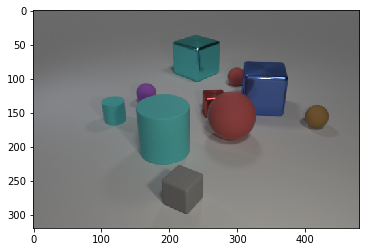

In [8]:
plt.imshow(image)

In [9]:
# Run detection
results = model.detect([image], verbose=1)

Processing 1 images
image                    shape: (320, 480, 3)         min:    5.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 109)              min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


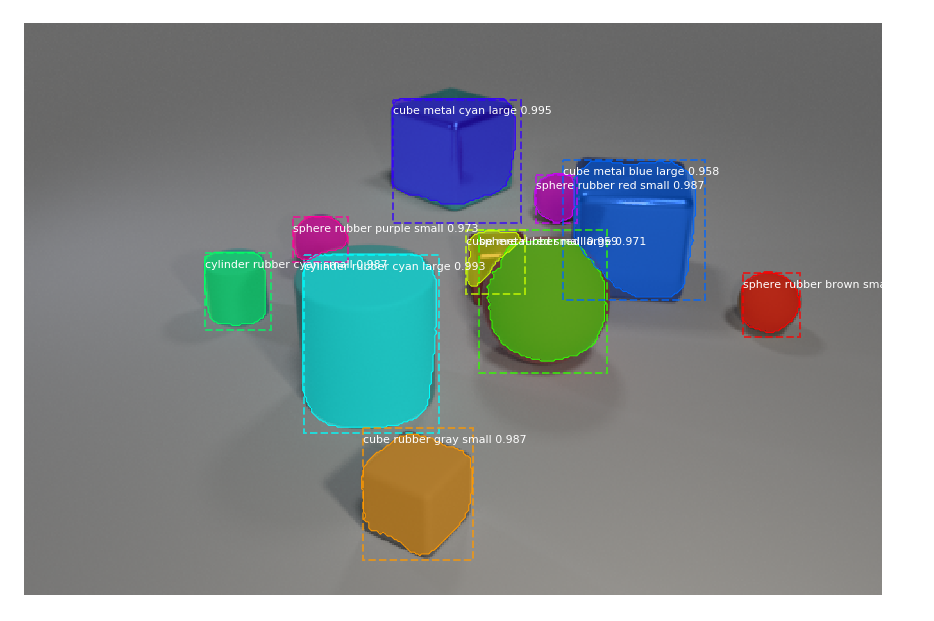

In [10]:
# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [19]:
r['rois'][0]

array([ 86, 118, 186, 204], dtype=int32)

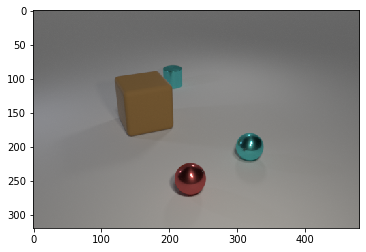

In [20]:
plt.imshow(image)

In [33]:
r['rois'][0]

array([110, 134, 233, 237], dtype=int32)

In [34]:
y1, x1, y2, x2 = r['rois'][0]

In [35]:
y1

110

In [36]:
(x1, y1), x2 - x1, y2 - y1,

((134, 110), 103, 123)

In [37]:
class_names[84]

'cylinder metal blue large'